In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib as plt
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler
import csv

%run '/kaggle/input/cte-dataloader/CTE.ipynb'
%run '/kaggle/input/cte-dataloader/dataloader.ipynb'


import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


wsegs_writer_index_table.pickle
----------
loading dataset /kaggle/input/cvl-words/cvl_word_segments with images: 69839
number of writer is: 310
-*-*-*-*-*-*-*-*-*-*
wsegs_writer_index_table.pickle
----------
loading dataset /kaggle/input/cvl-words/cvl_word_segments with images: 20151
number of writer is: 310
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 6.297751425221685
Testing epoch: 0   avg testing loss is: 3.894134381271544
Testing on epoch: 0 has accuracy: top1: 25.24 top5: 55.12


/tmp/ipykernel_23/1894641016.py:131: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_23/1894641016.py:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


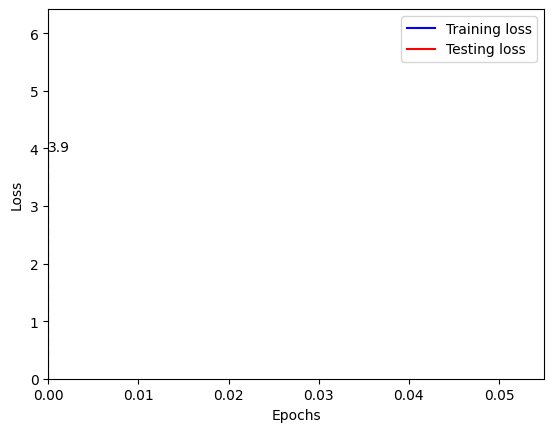

Traing epoch: 1   avg loss is: 3.278278124102969
Testing epoch: 1   avg testing loss is: 3.366983377933502
Testing on epoch: 1 has accuracy: top1: 39.00 top5: 70.83


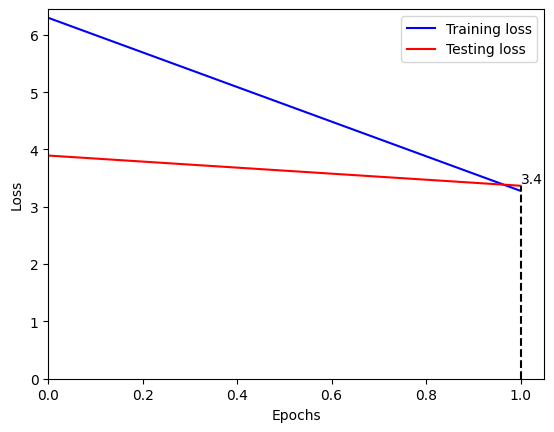

Traing epoch: 2   avg loss is: 2.647173570641457
Testing epoch: 2   avg testing loss is: 2.602533524093174
Testing on epoch: 2 has accuracy: top1: 57.02 top5: 84.70


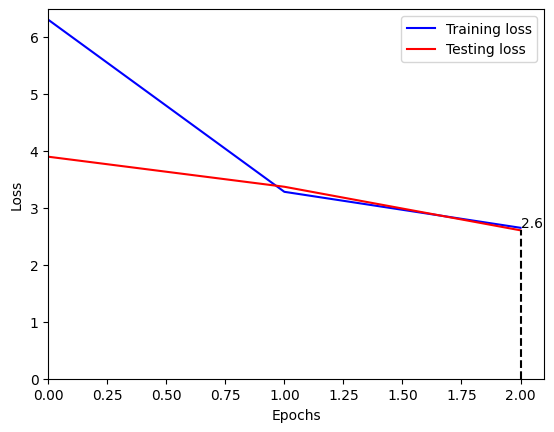

Traing epoch: 3   avg loss is: 2.3073820535137934
Testing epoch: 3   avg testing loss is: 2.1804244121861838
Testing on epoch: 3 has accuracy: top1: 69.79 top5: 90.42


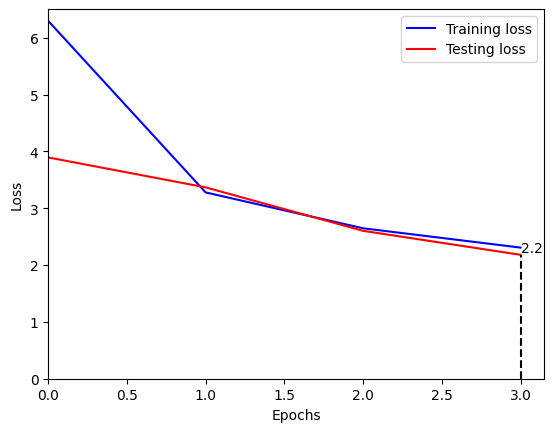

Traing epoch: 4   avg loss is: 2.07600152776615
Testing epoch: 4   avg testing loss is: 2.0597381641940467
Testing on epoch: 4 has accuracy: top1: 73.12 top5: 92.46


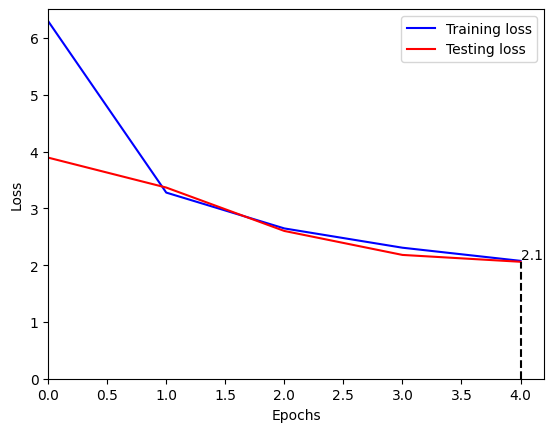

Traing epoch: 5   avg loss is: 1.9100397979306256
Testing epoch: 5   avg testing loss is: 1.893230576553042
Testing on epoch: 5 has accuracy: top1: 79.14 top5: 94.41


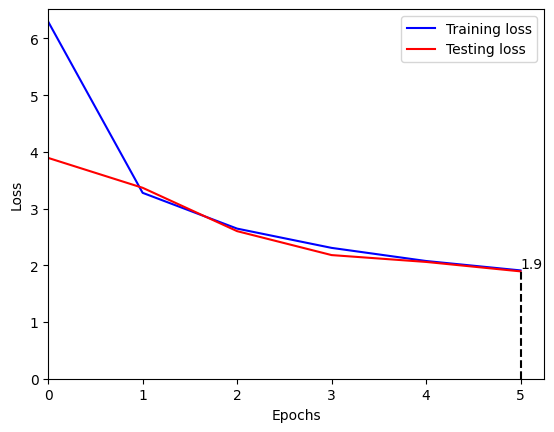

Traing epoch: 6   avg loss is: 1.7846427624865915
Testing epoch: 6   avg testing loss is: 1.78472482022785
Testing on epoch: 6 has accuracy: top1: 81.29 top5: 95.71


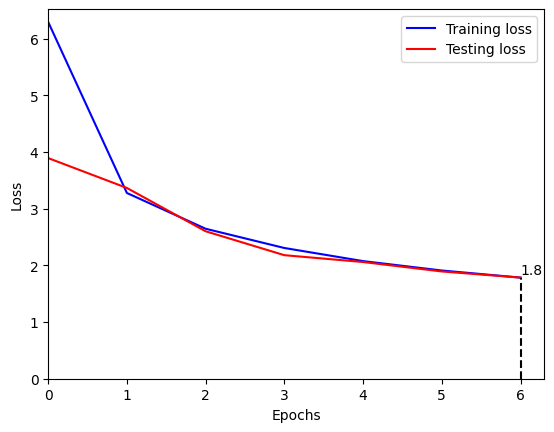

Traing epoch: 7   avg loss is: 1.6909973102900875
Testing epoch: 7   avg testing loss is: 1.7651529069930787
Testing on epoch: 7 has accuracy: top1: 81.52 top5: 95.61


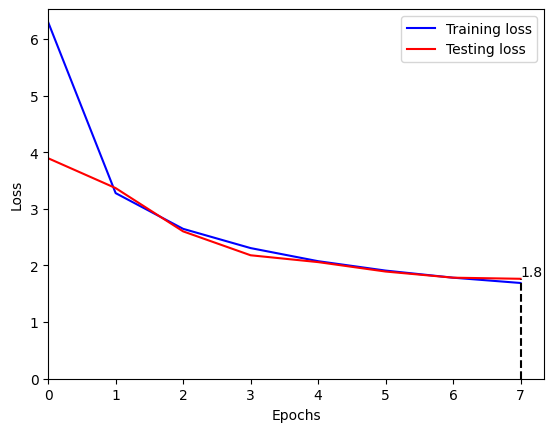

Traing epoch: 8   avg loss is: 1.6106004749930964
Testing epoch: 8   avg testing loss is: 1.6951987883401296
Testing on epoch: 8 has accuracy: top1: 83.98 top5: 96.25


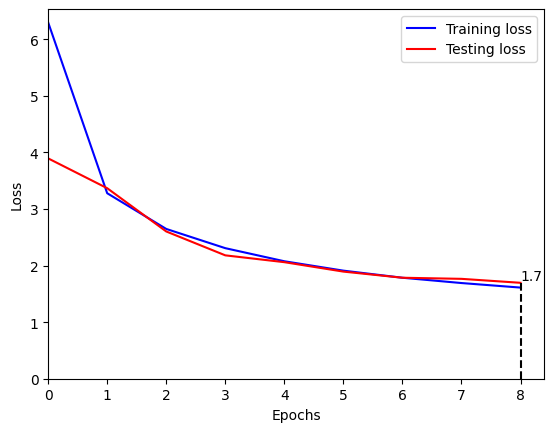

Traing epoch: 9   avg loss is: 1.5422189353694618
Testing epoch: 9   avg testing loss is: 1.6317135592301686
Testing on epoch: 9 has accuracy: top1: 85.37 top5: 96.53


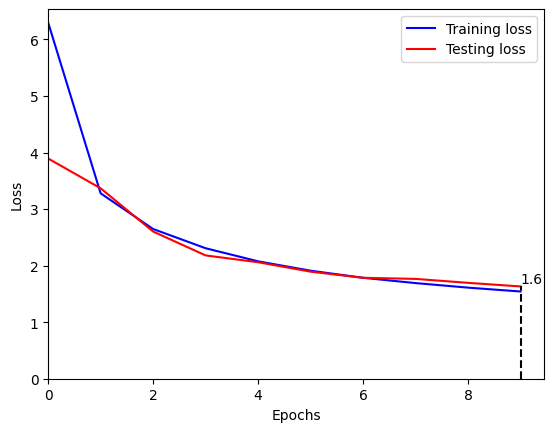

Traing epoch: 10   avg loss is: 1.354380816002705
Testing epoch: 10   avg testing loss is: 1.4670845526551444
Testing on epoch: 10 has accuracy: top1: 90.26 top5: 97.98


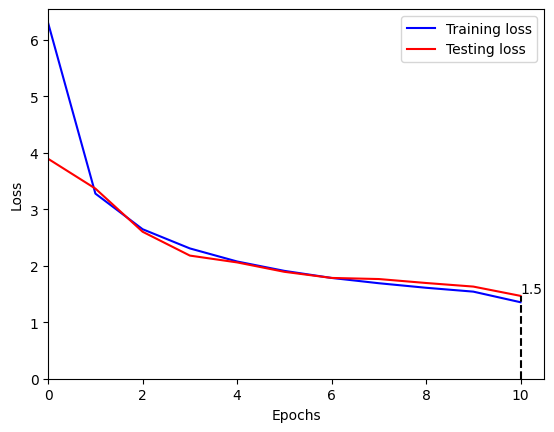

Traing epoch: 11   avg loss is: 1.3069657648407353
Testing epoch: 11   avg testing loss is: 1.4445565484818959
Testing on epoch: 11 has accuracy: top1: 91.18 top5: 97.91


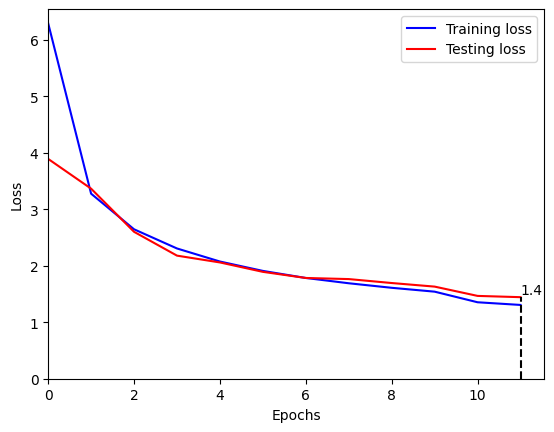

Traing epoch: 12   avg loss is: 1.2745844828874884
Testing epoch: 12   avg testing loss is: 1.4001545439636895
Testing on epoch: 12 has accuracy: top1: 91.80 top5: 98.14


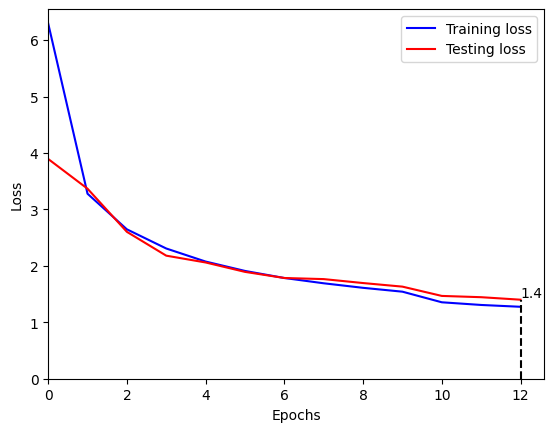

Traing epoch: 13   avg loss is: 1.245887302511007
Testing epoch: 13   avg testing loss is: 1.3875184380818928
Testing on epoch: 13 has accuracy: top1: 91.96 top5: 98.02


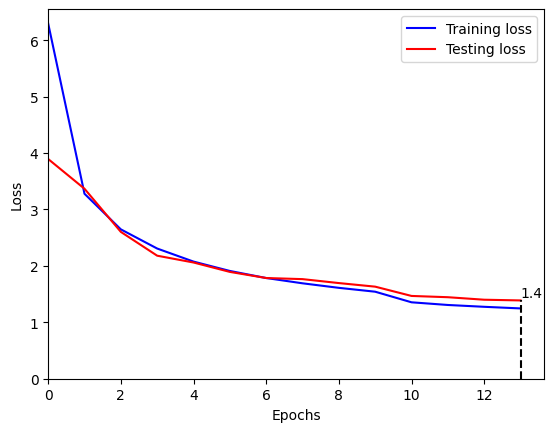

Traing epoch: 14   avg loss is: 1.2216113425251762
Testing epoch: 14   avg testing loss is: 1.380877469645606
Testing on epoch: 14 has accuracy: top1: 92.15 top5: 98.18


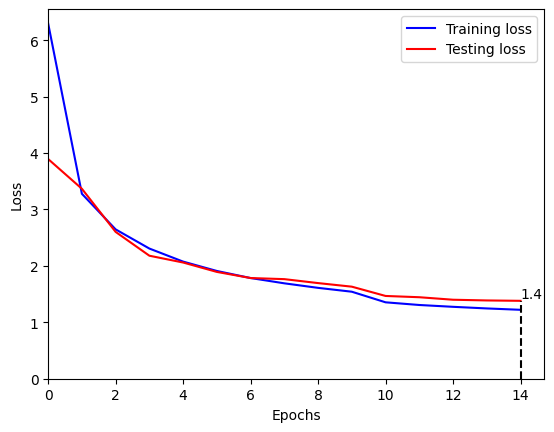

Traing epoch: 15   avg loss is: 1.2006575486509217
Testing epoch: 15   avg testing loss is: 1.3627384555718256
Testing on epoch: 15 has accuracy: top1: 92.45 top5: 98.29


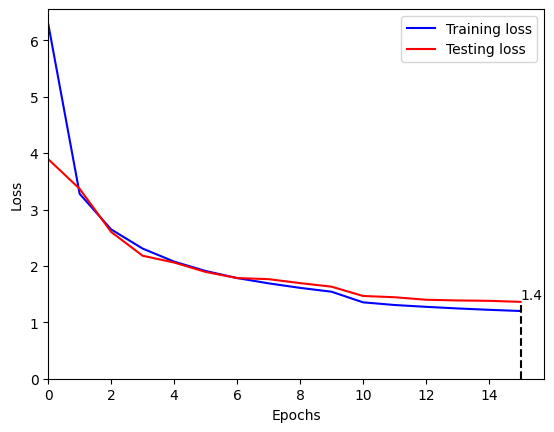

Traing epoch: 16   avg loss is: 1.1797579733687296
Testing epoch: 16   avg testing loss is: 1.3441148069169786
Testing on epoch: 16 has accuracy: top1: 92.78 top5: 98.21


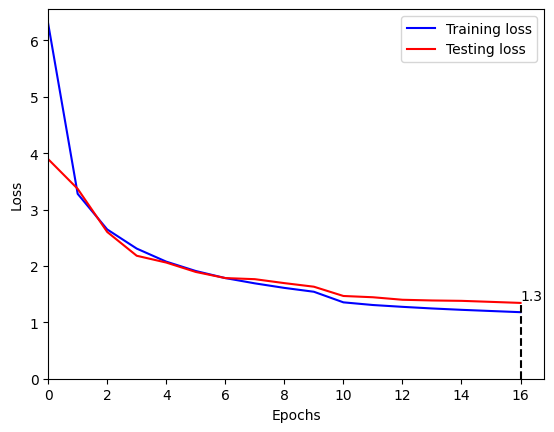

Traing epoch: 17   avg loss is: 1.1628093365460335
Testing epoch: 17   avg testing loss is: 1.387641462920204
Testing on epoch: 17 has accuracy: top1: 91.13 top5: 97.91


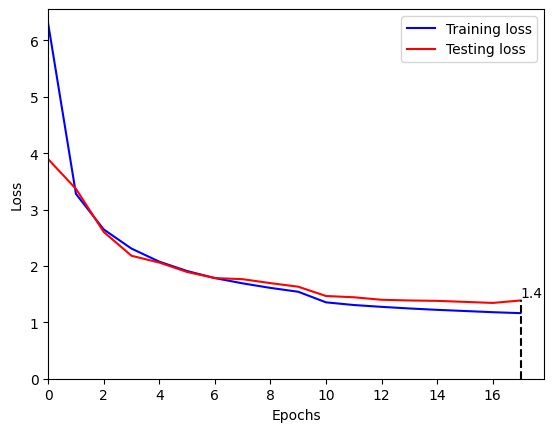

Traing epoch: 18   avg loss is: 1.1489755864759632
Testing epoch: 18   avg testing loss is: 1.3399884322332958
Testing on epoch: 18 has accuracy: top1: 92.43 top5: 98.32


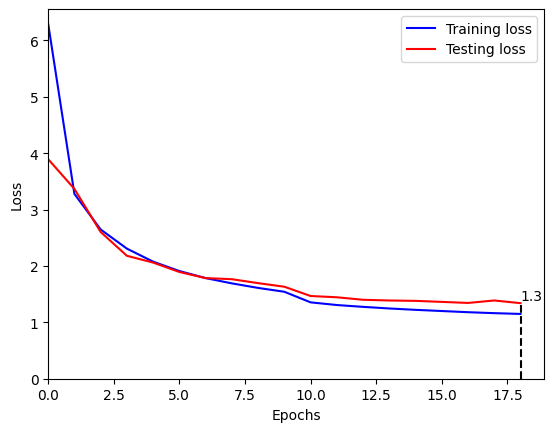

Traing epoch: 19   avg loss is: 1.1377672500341558
Testing epoch: 19   avg testing loss is: 1.3233471578075773
Testing on epoch: 19 has accuracy: top1: 92.77 top5: 98.33


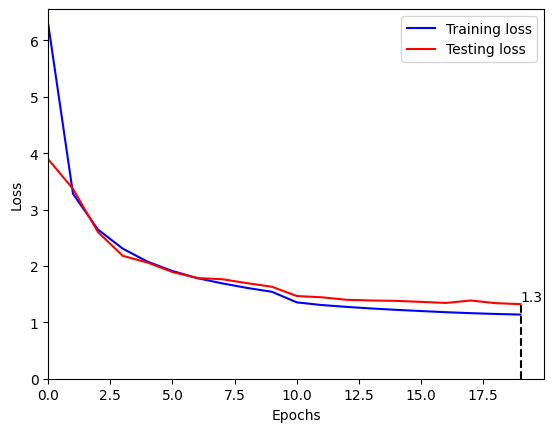

Traing epoch: 20   avg loss is: 1.077960448457384
Testing epoch: 20   avg testing loss is: 1.2675124789041186
Testing on epoch: 20 has accuracy: top1: 94.18 top5: 98.50


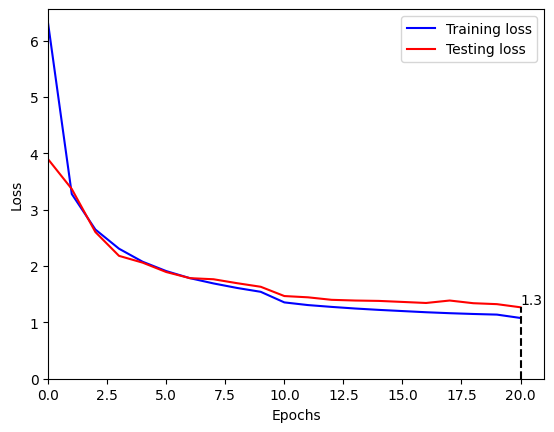

Traing epoch: 21   avg loss is: 1.0665356116924234
Testing epoch: 21   avg testing loss is: 1.2568162740222992
Testing on epoch: 21 has accuracy: top1: 94.33 top5: 98.50


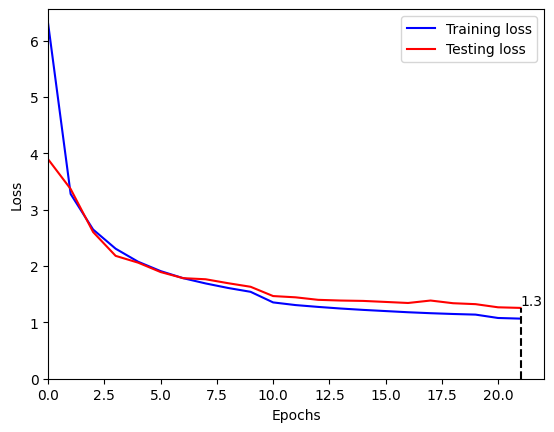

Traing epoch: 22   avg loss is: 1.0579855906974276
Testing epoch: 22   avg testing loss is: 1.2627756764018347
Testing on epoch: 22 has accuracy: top1: 94.04 top5: 98.45


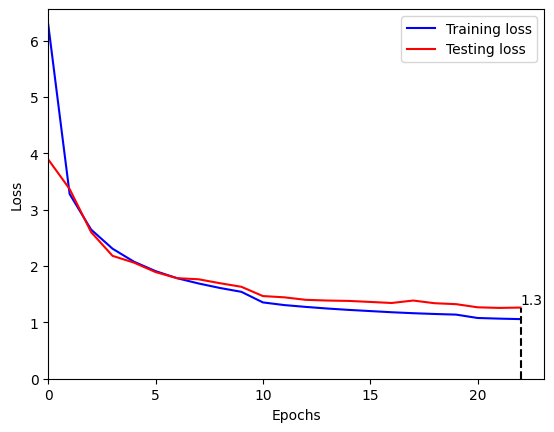

Traing epoch: 23   avg loss is: 1.0513990080269184
Testing epoch: 23   avg testing loss is: 1.2648765029415252
Testing on epoch: 23 has accuracy: top1: 93.94 top5: 98.51


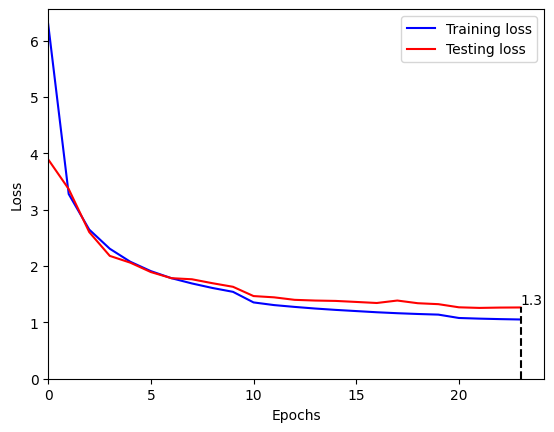

Traing epoch: 24   avg loss is: 1.0431969588661718
Testing epoch: 24   avg testing loss is: 1.2450398320243472
Testing on epoch: 24 has accuracy: top1: 94.39 top5: 98.60


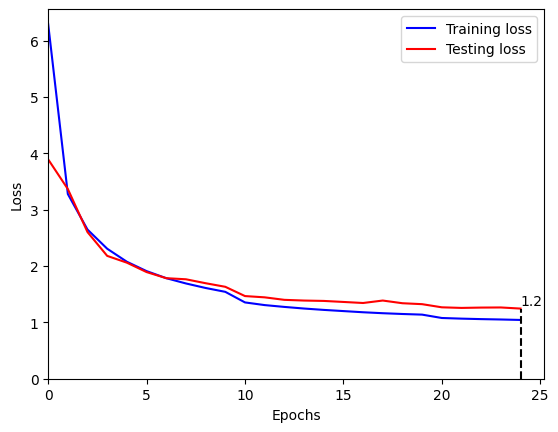

Traing epoch: 25   avg loss is: 1.038455116787053
Testing epoch: 25   avg testing loss is: 1.2401516054357802
Testing on epoch: 25 has accuracy: top1: 94.46 top5: 98.55


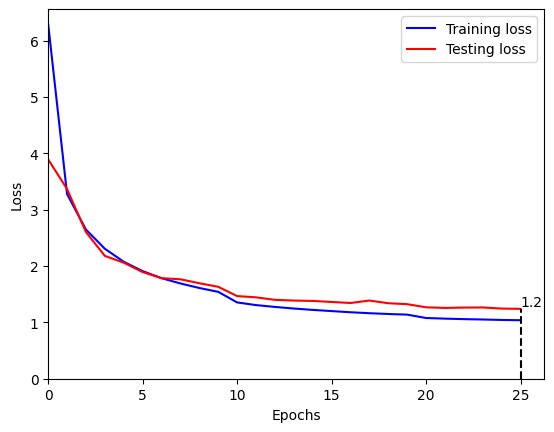

Traing epoch: 26   avg loss is: 1.0335390103262132
Testing epoch: 26   avg testing loss is: 1.2422557494943105
Testing on epoch: 26 has accuracy: top1: 94.61 top5: 98.55


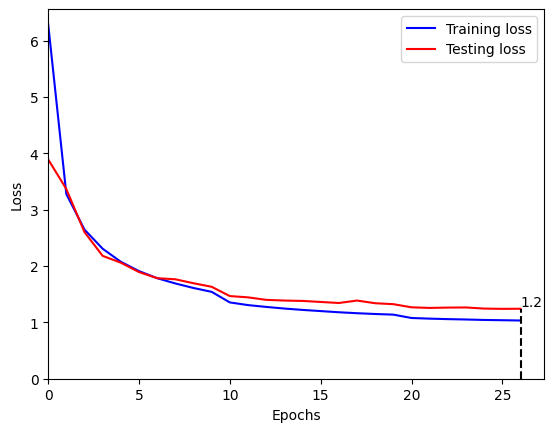

Traing epoch: 27   avg loss is: 1.0280407027270573
Testing epoch: 27   avg testing loss is: 1.2587518239778186
Testing on epoch: 27 has accuracy: top1: 93.83 top5: 98.40


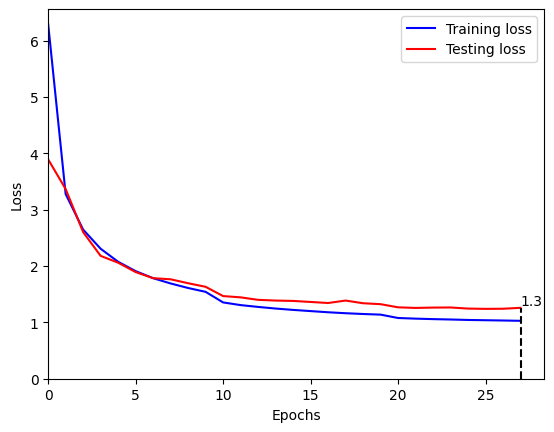

Traing epoch: 28   avg loss is: 1.0252797097841826
Testing epoch: 28   avg testing loss is: 1.241539131175904
Testing on epoch: 28 has accuracy: top1: 94.14 top5: 98.55


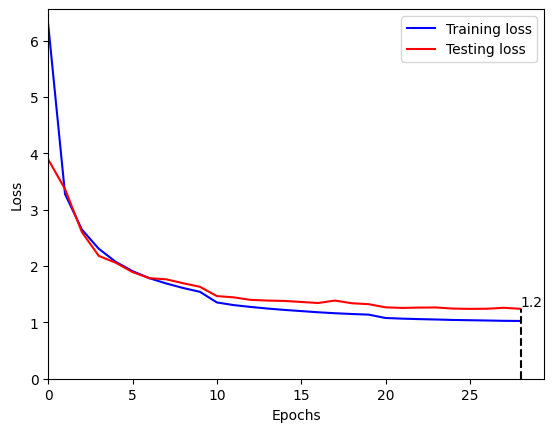

Traing epoch: 29   avg loss is: 1.021451527486691
Testing epoch: 29   avg testing loss is: 1.23121120149181
Testing on epoch: 29 has accuracy: top1: 94.56 top5: 98.64


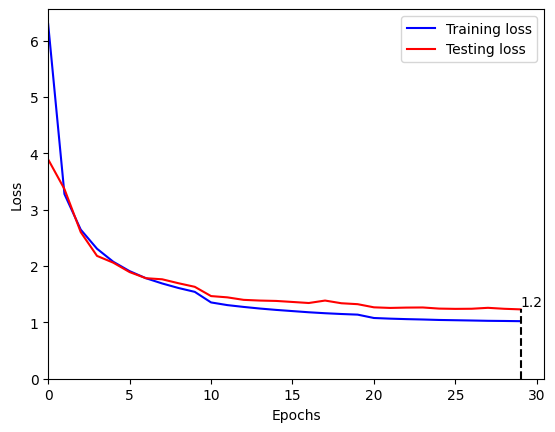

Traing epoch: 30   avg loss is: 1.0024739831385538
Testing epoch: 30   avg testing loss is: 1.215589971816729
Testing on epoch: 30 has accuracy: top1: 95.09 top5: 98.69


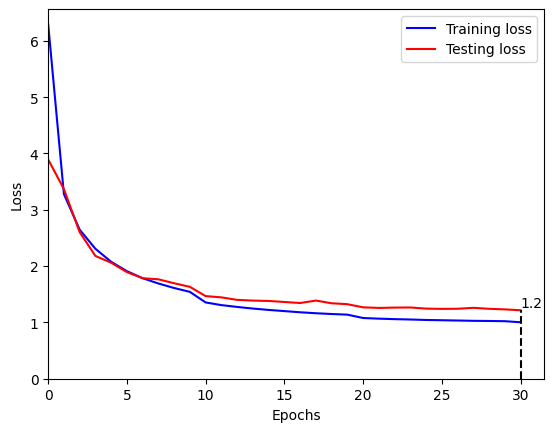

Traing epoch: 31   avg loss is: 0.9983426696602955
Testing epoch: 31   avg testing loss is: 1.2128777699811117
Testing on epoch: 31 has accuracy: top1: 95.07 top5: 98.70


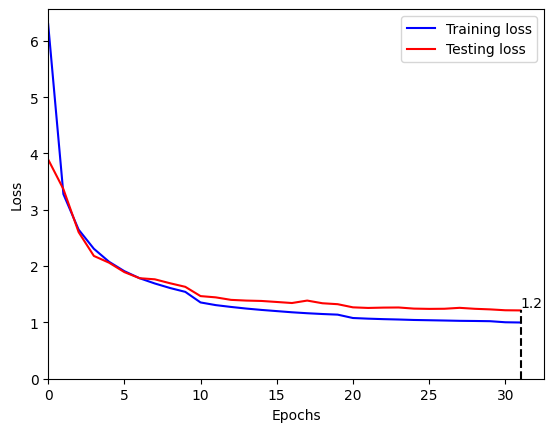

Traing epoch: 32   avg loss is: 0.995205277483142
Testing epoch: 32   avg testing loss is: 1.216409113057076
Testing on epoch: 32 has accuracy: top1: 94.99 top5: 98.67


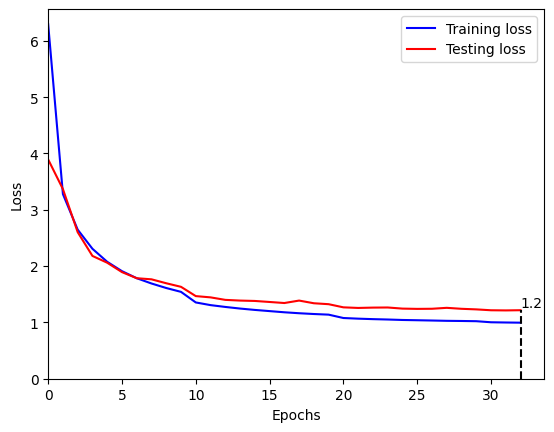

Traing epoch: 33   avg loss is: 0.9926547514092037
Testing epoch: 33   avg testing loss is: 1.2109547991128196
Testing on epoch: 33 has accuracy: top1: 95.08 top5: 98.68


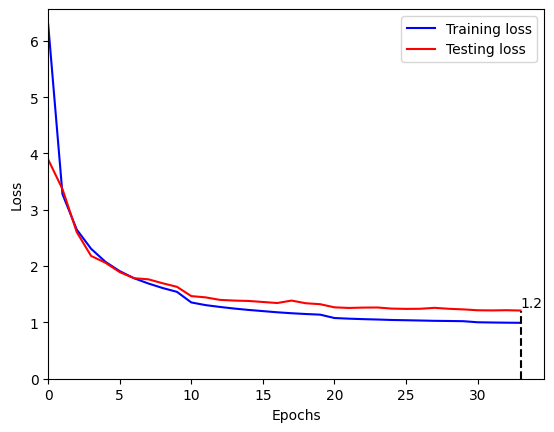

Traing epoch: 34   avg loss is: 0.9906676092844945
Testing epoch: 34   avg testing loss is: 1.2136244116794495
Testing on epoch: 34 has accuracy: top1: 95.00 top5: 98.63


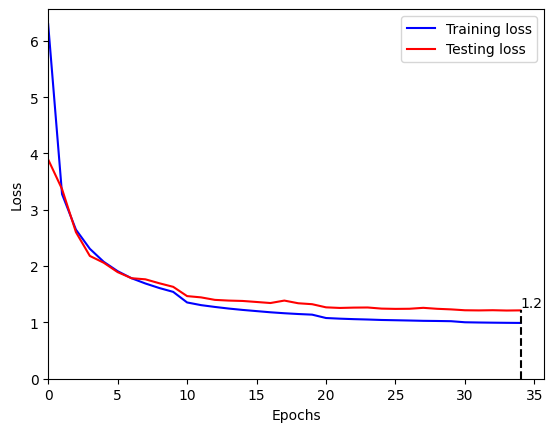

Traing epoch: 35   avg loss is: 0.9882843157875767
Testing epoch: 35   avg testing loss is: 1.2136793735954496
Testing on epoch: 35 has accuracy: top1: 95.00 top5: 98.68


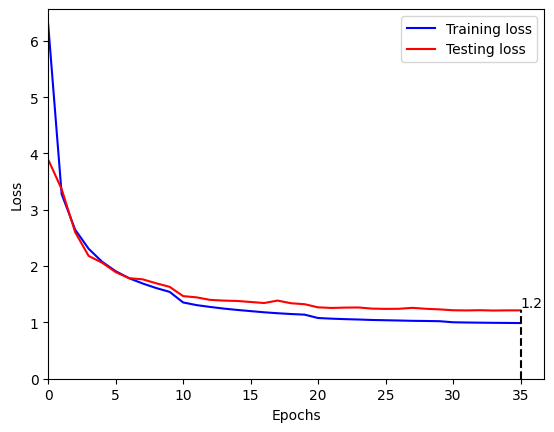

Traing epoch: 36   avg loss is: 0.9865972091171525
Testing epoch: 36   avg testing loss is: 1.2130110918056398
Testing on epoch: 36 has accuracy: top1: 94.91 top5: 98.66


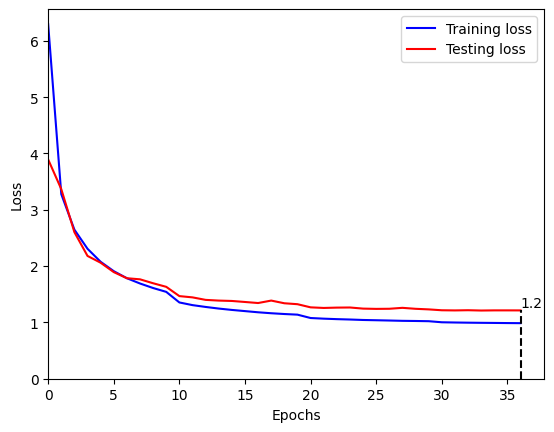

Traing epoch: 37   avg loss is: 0.9847626220076375
Testing epoch: 37   avg testing loss is: 1.2129568794890055
Testing on epoch: 37 has accuracy: top1: 95.00 top5: 98.66


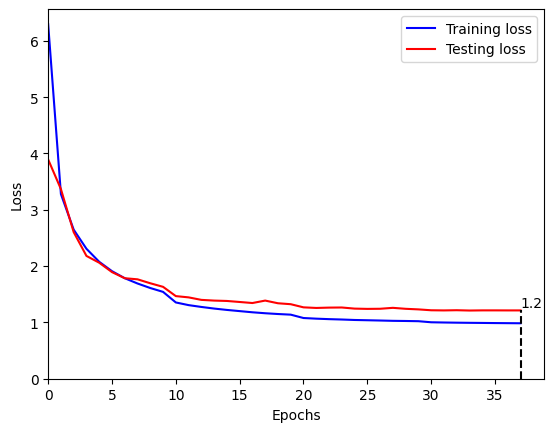

Traing epoch: 38   avg loss is: 0.9837227355139065
Testing epoch: 38   avg testing loss is: 1.2139971225980728
Testing on epoch: 38 has accuracy: top1: 95.04 top5: 98.67


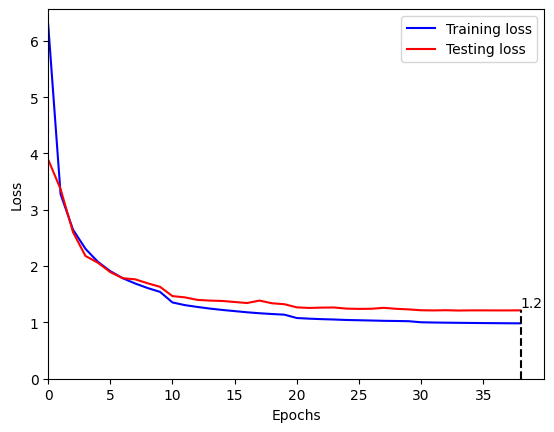

Traing epoch: 39   avg loss is: 0.9814620026610075
Testing epoch: 39   avg testing loss is: 1.2175036526388592
Testing on epoch: 39 has accuracy: top1: 95.04 top5: 98.59


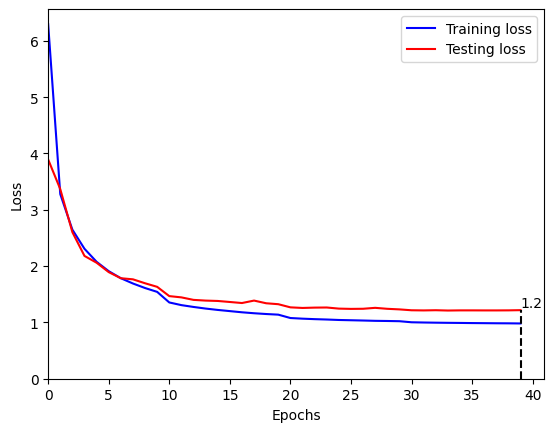

Traing epoch: 40   avg loss is: 0.9747893646646267
Testing epoch: 40   avg testing loss is: 1.201424634172803
Testing on epoch: 40 has accuracy: top1: 95.32 top5: 98.72


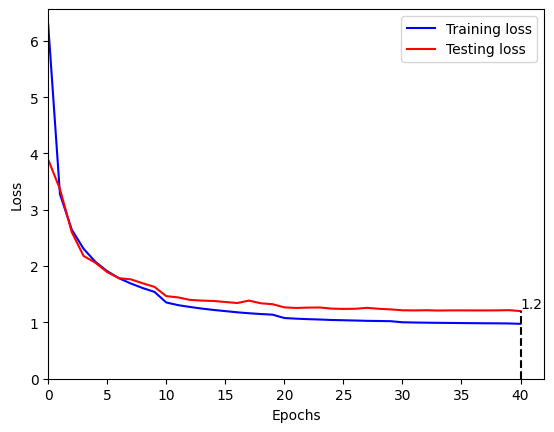

Traing epoch: 41   avg loss is: 0.9728108779155913
Testing epoch: 41   avg testing loss is: 1.2024333528109958
Testing on epoch: 41 has accuracy: top1: 95.41 top5: 98.68


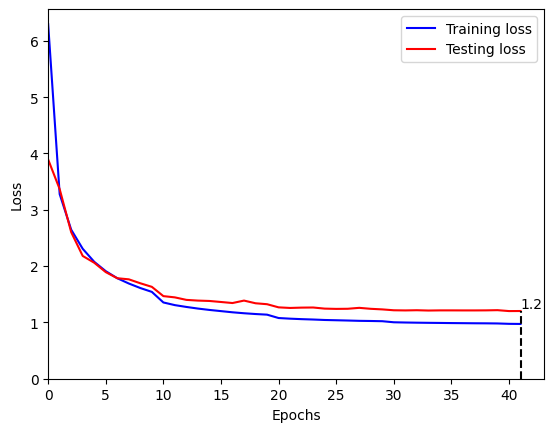

Traing epoch: 42   avg loss is: 0.9717018562211125
Testing epoch: 42   avg testing loss is: 1.2070225182506773
Testing on epoch: 42 has accuracy: top1: 95.29 top5: 98.69


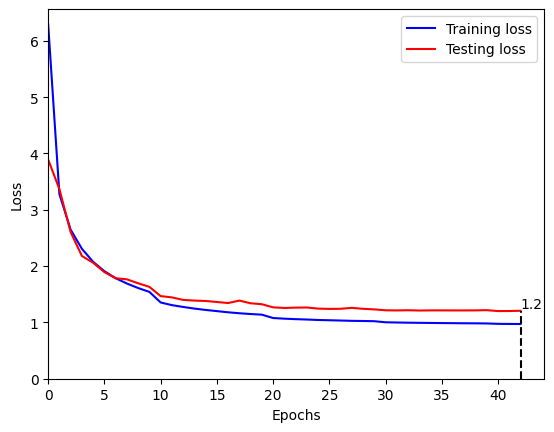

Traing epoch: 43   avg loss is: 0.9707720468041003
Testing epoch: 43   avg testing loss is: 1.2068935399017637
Testing on epoch: 43 has accuracy: top1: 95.31 top5: 98.77


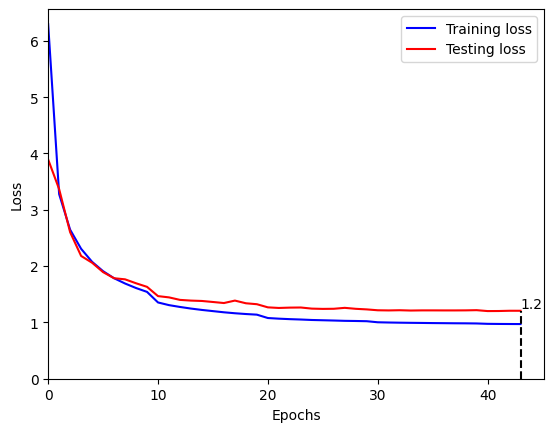

Traing epoch: 44   avg loss is: 0.9697625192751259
Testing epoch: 44   avg testing loss is: 1.2007333964109421
Testing on epoch: 44 has accuracy: top1: 95.49 top5: 98.71


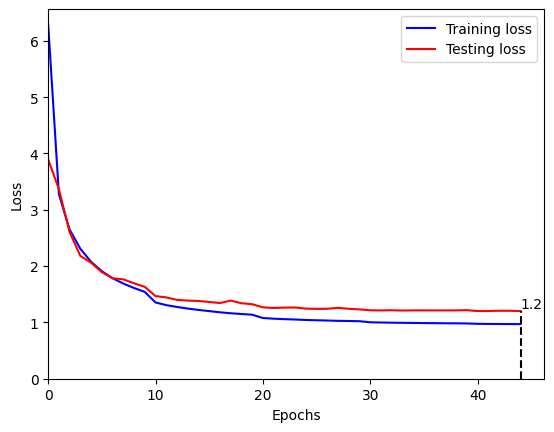

Traing epoch: 45   avg loss is: 0.9689494197817705
Testing epoch: 45   avg testing loss is: 1.2023158176077737
Testing on epoch: 45 has accuracy: top1: 95.38 top5: 98.75


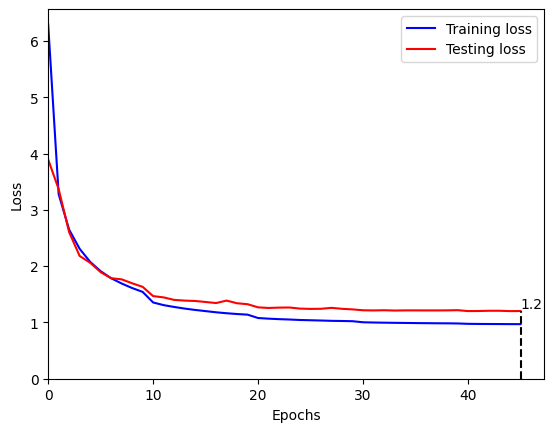

Traing epoch: 46   avg loss is: 0.9680680630952256
Testing epoch: 46   avg testing loss is: 1.2081473326399212
Testing on epoch: 46 has accuracy: top1: 95.36 top5: 98.72


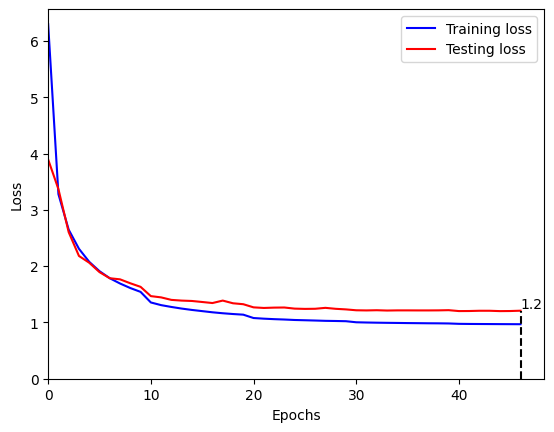

Traing epoch: 47   avg loss is: 0.9675990399912232
Testing epoch: 47   avg testing loss is: 1.2056786579745156
Testing on epoch: 47 has accuracy: top1: 95.38 top5: 98.79


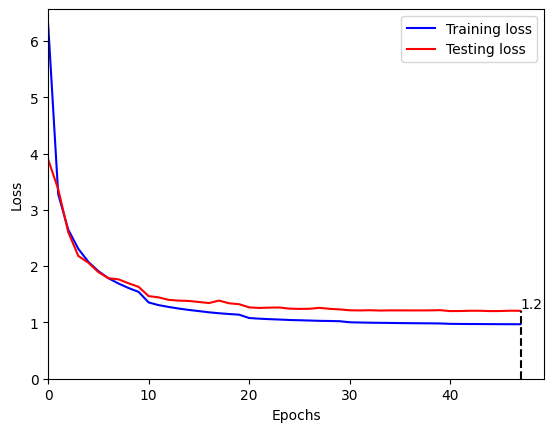

Traing epoch: 48   avg loss is: 0.9665831781165738
Testing epoch: 48   avg testing loss is: 1.203173749976688
Testing on epoch: 48 has accuracy: top1: 95.36 top5: 98.76


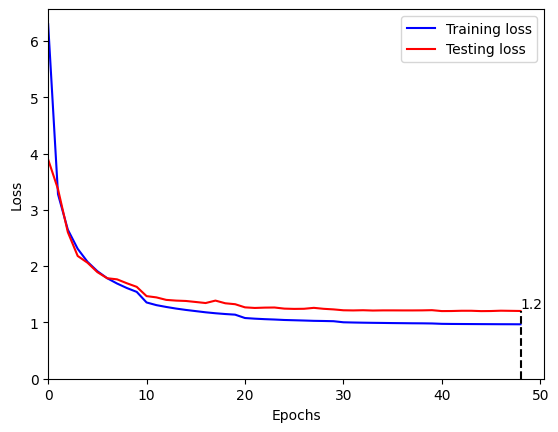

Traing epoch: 49   avg loss is: 0.9659202830929149
Testing epoch: 49   avg testing loss is: 1.2089023752344978
Testing on epoch: 49 has accuracy: top1: 95.42 top5: 98.80


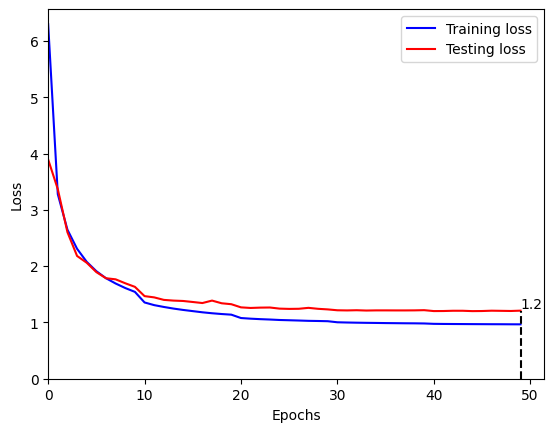

Traing epoch: 50   avg loss is: 0.9632166647971168
Testing epoch: 50   avg testing loss is: 1.205640049680831
Testing on epoch: 50 has accuracy: top1: 95.33 top5: 98.78


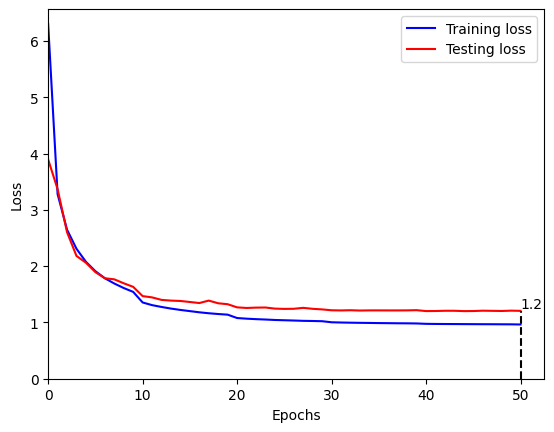

Traing epoch: 51   avg loss is: 0.9621770986578642
Testing epoch: 51   avg testing loss is: 1.2001815497875215
Testing on epoch: 51 has accuracy: top1: 95.40 top5: 98.82


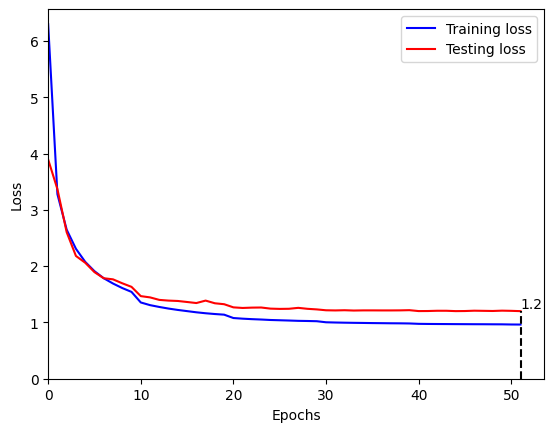

Traing epoch: 52   avg loss is: 0.9617074869921401
Testing epoch: 52   avg testing loss is: 1.203476459119055
Testing on epoch: 52 has accuracy: top1: 95.33 top5: 98.80


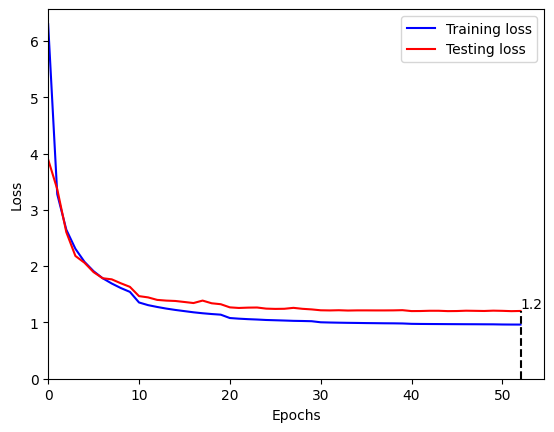

Traing epoch: 53   avg loss is: 0.9613198993896586
Testing epoch: 53   avg testing loss is: 1.1989427963892618
Testing on epoch: 53 has accuracy: top1: 95.50 top5: 98.76


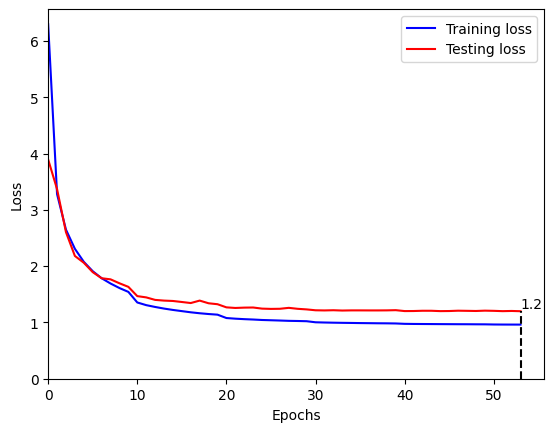

Traing epoch: 54   avg loss is: 0.9605175016343758
Testing epoch: 54   avg testing loss is: 1.2029397706190745
Testing on epoch: 54 has accuracy: top1: 95.44 top5: 98.77


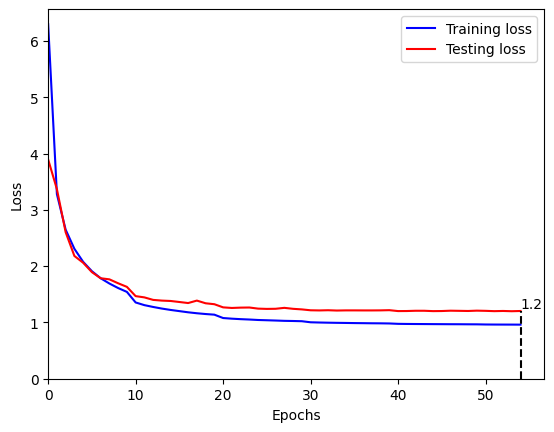

Traing epoch: 55   avg loss is: 0.9604068590920525
Testing epoch: 55   avg testing loss is: 1.2057051774528291
Testing on epoch: 55 has accuracy: top1: 95.39 top5: 98.77


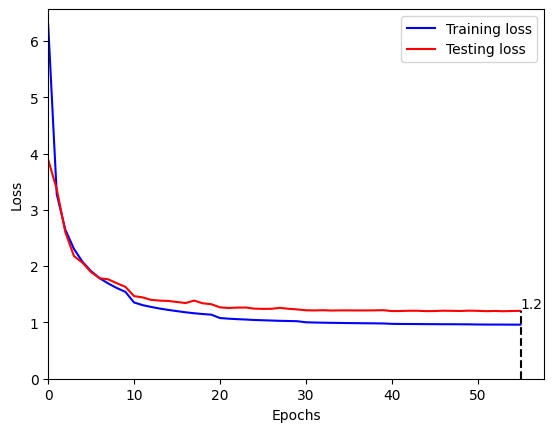

Traing epoch: 56   avg loss is: 0.9600128876053883
Testing epoch: 56   avg testing loss is: 1.2033935136265226
Testing on epoch: 56 has accuracy: top1: 95.45 top5: 98.78


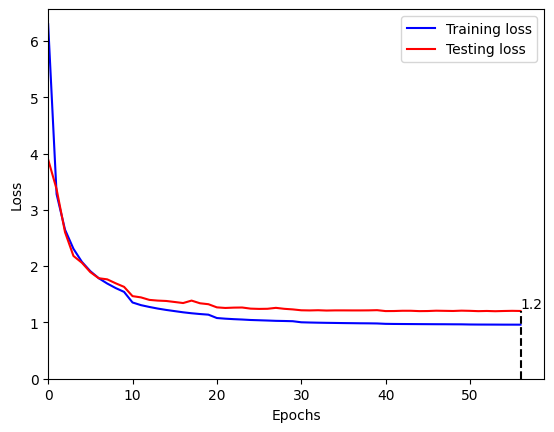

Traing epoch: 57   avg loss is: 0.9596102961589174
Testing epoch: 57   avg testing loss is: 1.2068996414305673
Testing on epoch: 57 has accuracy: top1: 95.50 top5: 98.77


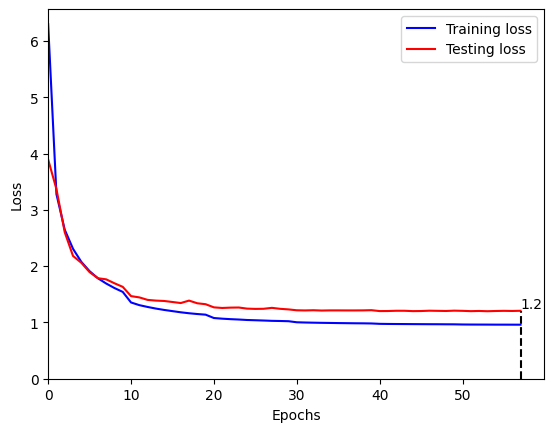

Traing epoch: 58   avg loss is: 0.9590515956268958
Testing epoch: 58   avg testing loss is: 1.199859209950008
Testing on epoch: 58 has accuracy: top1: 95.51 top5: 98.81


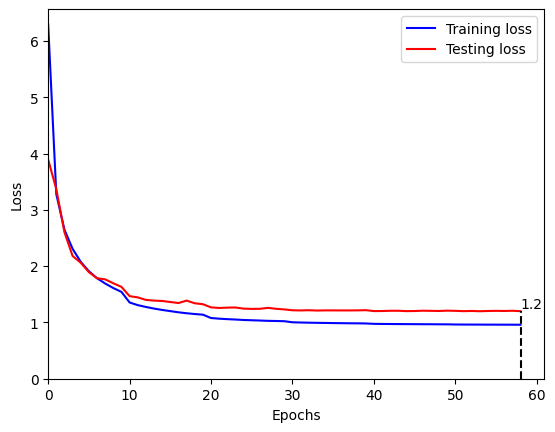

Traing epoch: 59   avg loss is: 0.9589550895061545
Testing epoch: 59   avg testing loss is: 1.203144082663551
Testing on epoch: 59 has accuracy: top1: 95.41 top5: 98.75


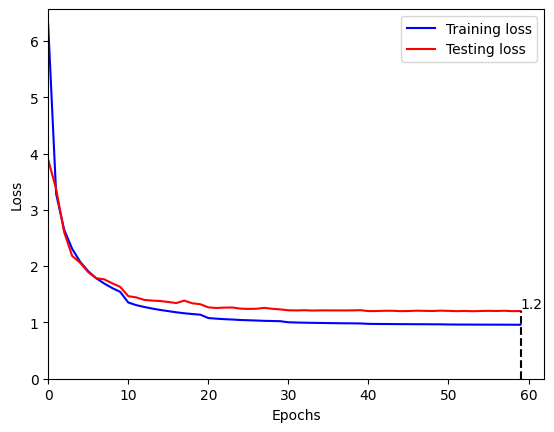

Traing epoch: 60   avg loss is: 0.9576489050709578
Testing epoch: 60   avg testing loss is: 1.2062279672849745
Testing on epoch: 60 has accuracy: top1: 95.42 top5: 98.82


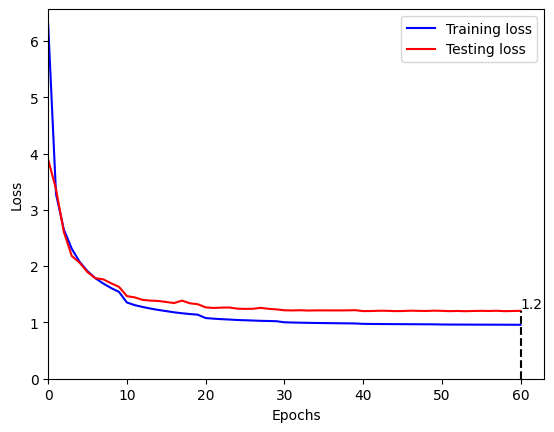

Traing epoch: 61   avg loss is: 0.9573644513279664
Testing epoch: 61   avg testing loss is: 1.203467062919859
Testing on epoch: 61 has accuracy: top1: 95.45 top5: 98.79


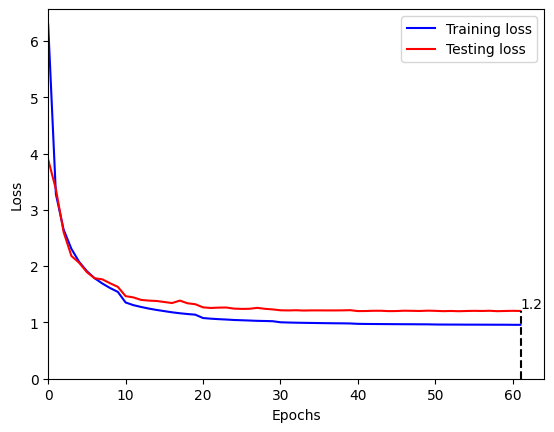

Traing epoch: 62   avg loss is: 0.9569567919569645
Testing epoch: 62   avg testing loss is: 1.2004685964376207
Testing on epoch: 62 has accuracy: top1: 95.59 top5: 98.78


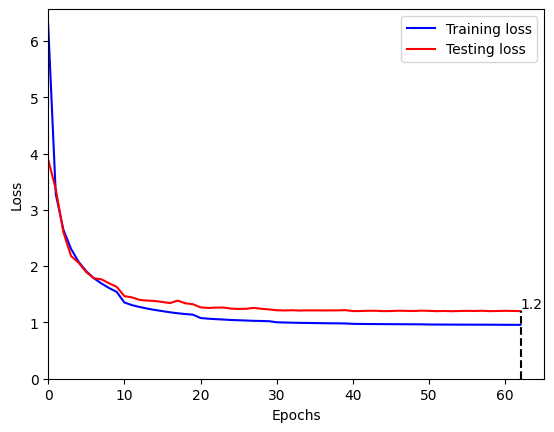

Traing epoch: 63   avg loss is: 0.9568748773919892
Testing epoch: 63   avg testing loss is: 1.2052030610186713
Testing on epoch: 63 has accuracy: top1: 95.50 top5: 98.75


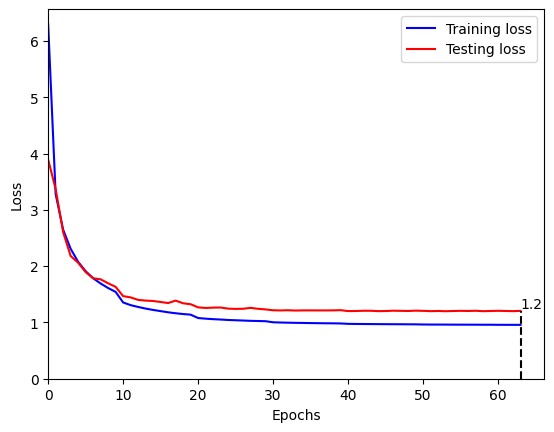

Traing epoch: 64   avg loss is: 0.9567298892301556
Testing epoch: 64   avg testing loss is: 1.2042638061538575
Testing on epoch: 64 has accuracy: top1: 95.53 top5: 98.75


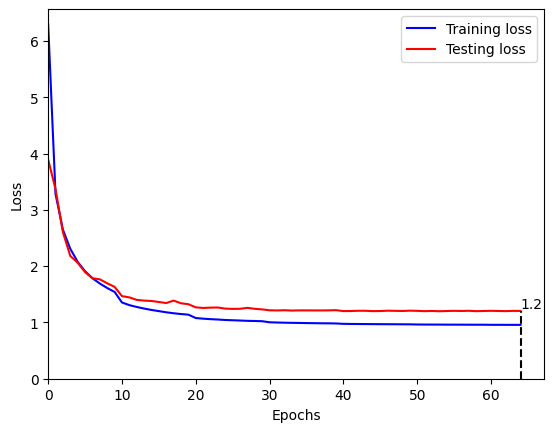

Traing epoch: 65   avg loss is: 0.9562518953129745
Testing epoch: 65   avg testing loss is: 1.2062957939647494
Testing on epoch: 65 has accuracy: top1: 95.46 top5: 98.77


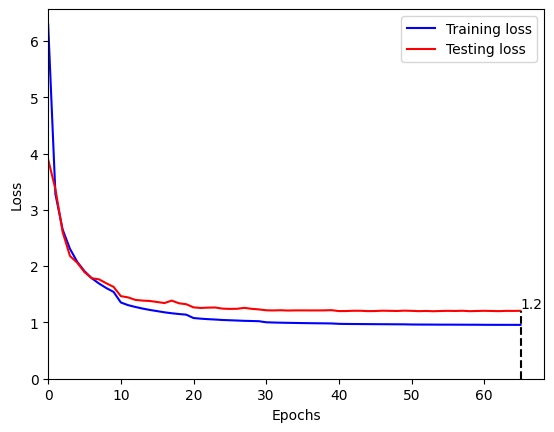

Traing epoch: 66   avg loss is: 0.9559225708819878
Testing epoch: 66   avg testing loss is: 1.199579582469804
Testing on epoch: 66 has accuracy: top1: 95.53 top5: 98.79


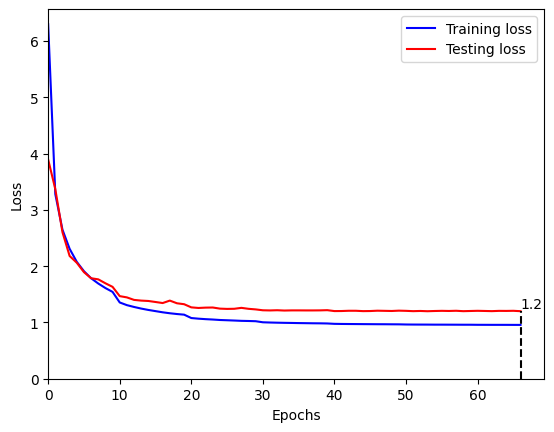

Traing epoch: 67   avg loss is: 0.9559634919427711
Testing epoch: 67   avg testing loss is: 1.2068586003212702
Testing on epoch: 67 has accuracy: top1: 95.50 top5: 98.78


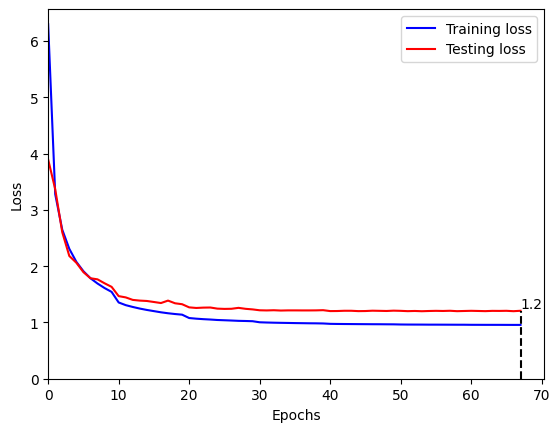

Traing epoch: 68   avg loss is: 0.9558625673887163
Testing epoch: 68   avg testing loss is: 1.2057521027705027
Testing on epoch: 68 has accuracy: top1: 95.46 top5: 98.77


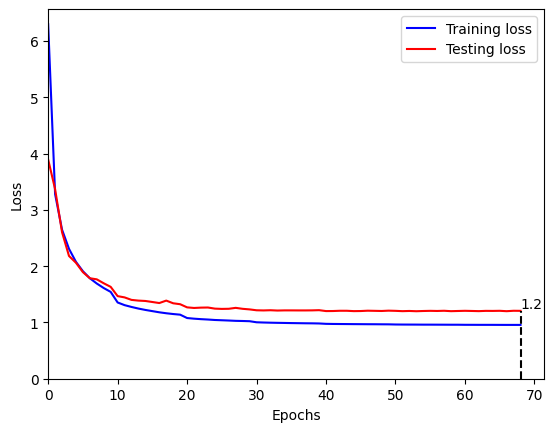

Traing epoch: 69   avg loss is: 0.9557359680383168
Testing epoch: 69   avg testing loss is: 1.20621853764095
Testing on epoch: 69 has accuracy: top1: 95.45 top5: 98.76


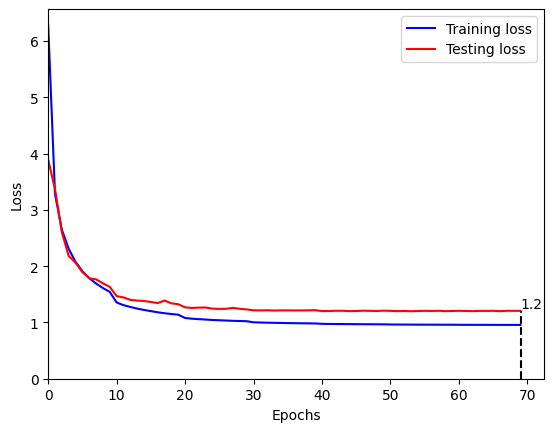

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/holdout_set/'

        self.imgtype=imgtype
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        basedir = 'CTE_WriterIdentification_dataset_ICDAR19_model'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=True, drop_last=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)


    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)

            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()

        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))


        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)



        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)



    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')
        
    def plot_losses(self, training_losses, testing_losses, csv_file_path="/kaggle/working/losses.csv"):
        indices = range(len(training_losses))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        #
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')
        plt.savefig("/kaggle/working/loss_plot.svg", format="svg", dpi=300)
        
        #plt.title('Training and Validation Losses')

        plt.show()
        
        with open(csv_file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['epoch', 'training_loss', 'testing_loss'])  
            for epoch, (train_loss, test_loss) in enumerate(zip(training_losses, testing_losses)):
                writer.writerow([epoch, train_loss, test_loss])
                

    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):
            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res





if __name__ == '__main__':


    mod = DeepWriter_Train(dataset='/kaggle/input/cvl-words/cvl_word_segments')
    mod.train_loops(0,70)